In [1]:
import seaborn as sns
import spacy
import nltk
from nltk import bigrams
#from nltk.corpus import stopwords
import pandas as pd
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_pickle("March.pkl")
#tweets = tweets.head(1000)

In [3]:
terms_bigram = [list(bigrams(tweet)) for tweet in tweets['tokenised']]

In [4]:
#terms_bigram[6]

In [5]:
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

#bigram_counts.most_common(20)

In [8]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(south, africa)",1865
1,"(stay, home)",789
2,"(corona, virus)",667
3,"(south, africans)",633
4,"(wash, hands)",352
5,"(stay, safe)",348
6,"(coronavirussa, covidsa)",339
7,"(south, african)",329
8,"(cyril, ramaphosa)",301
9,"(cape, town)",284


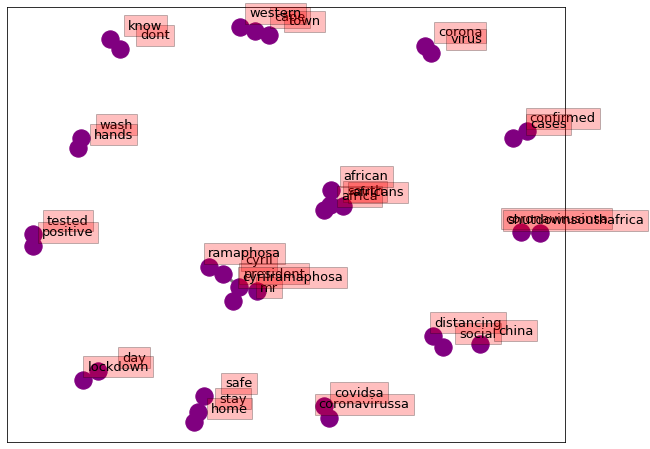

In [11]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()